# Essential Tools: Pandas

Pandas is the Python Data Analysis Library. 

Pandas is an extremely versatile tool for manipulating datasets.   

It also produces high quality plots with matplotlib, and integrates nicely with other libraries that expect NumPy arrays.

Use of Pandas is a data science __best practice.__

The most important tool provided by Pandas is the **data frame.**

A data frame is a table in which each row and column is given a label.

Pandas DataFrames are documented at:

http://pandas.pydata.org/pandas-docs/dev/generated/pandas.DataFrame.html

Get in the habit: whenever you load data, place it into a dataframe as your first step.

## Getting started

In [1]:
import pandas as pd
import pandas_datareader.data as web
from pandas import Series, DataFrame

import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

#pd.__version__

%matplotlib inline

## Fetching, storing and retrieving your data

For demonstration purposes, we'll use a utility library that fetches data from standard online sources, such as Yahoo! Finance.

In [2]:
stocks = 'YELP'
data_source = 'yahoo'
start = datetime(2015,1,1)
end = datetime(2015,12,31)

yahoo_stocks = web.DataReader(stocks, data_source, start, end)

yahoo_stocks.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,55.599998,54.240002,55.459999,55.150002,1664500,55.150002
2015-01-05,54.950001,52.330002,54.540001,52.529999,2023000,52.529999
2015-01-06,53.930000,50.750000,52.549999,52.439999,3762800,52.439999
2015-01-07,53.750000,51.759998,53.320000,52.209999,1548200,52.209999
2015-01-08,54.139999,51.759998,52.590000,53.830002,2015300,53.830002


This is a typical example of a dataframe.  

Notice how each row has a label and each column has a label.

A dataframe is an object that has __many__ methods associated with it, to do all sorts of useful things.

Here is a simple method: ``.info()``

In [3]:
yahoo_stocks.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2015-01-02 to 2015-12-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       252 non-null    float64
 1   Low        252 non-null    float64
 2   Open       252 non-null    float64
 3   Close      252 non-null    float64
 4   Volume     252 non-null    int64  
 5   Adj Close  252 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


### Reading to/from a ``.csv`` file

Continuing to explore methods, let's write the dataframe out to a ``.csv`` file:

In [4]:
yahoo_stocks.to_csv('yahoo_data.csv')

In [5]:
!head yahoo_data.csv

Date,High,Low,Open,Close,Volume,Adj Close
2015-01-02,55.599998474121094,54.2400016784668,55.459999084472656,55.150001525878906,1664500,55.150001525878906
2015-01-05,54.95000076293945,52.33000183105469,54.540000915527344,52.529998779296875,2023000,52.529998779296875
2015-01-06,53.93000030517578,50.75,52.54999923706055,52.439998626708984,3762800,52.439998626708984
2015-01-07,53.75,51.7599983215332,53.31999969482422,52.209999084472656,1548200,52.209999084472656
2015-01-08,54.13999938964844,51.7599983215332,52.59000015258789,53.83000183105469,2015300,53.83000183105469
2015-01-09,56.9900016784668,54.720001220703125,55.959999084472656,56.06999969482422,6224200,56.06999969482422
2015-01-12,56.060001373291016,53.43000030517578,56.0,54.02000045776367,2407700,54.02000045776367
2015-01-13,54.79999923706055,52.52000045776367,54.470001220703125,53.18000030517578,1958400,53.18000030517578
2015-01-14,53.68000030517578,51.459999084472656,52.79999923706055,52.20000076293945,1854600,52.20000076293945


And of course we can likewise read a ``.csv`` file into a dataframe.   This is probably the most common way you will get data into Pandas.

In [6]:
df = pd.read_csv('yahoo_data.csv')
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2015-01-02,55.599998,54.240002,55.459999,55.150002,1664500,55.150002
1,2015-01-05,54.950001,52.330002,54.540001,52.529999,2023000,52.529999
2,2015-01-06,53.930000,50.750000,52.549999,52.439999,3762800,52.439999
3,2015-01-07,53.750000,51.759998,53.320000,52.209999,1548200,52.209999
4,2015-01-08,54.139999,51.759998,52.590000,53.830002,2015300,53.830002


## Working with data columns

In general, we'll usually organize things so that rows in the dataframe are __items__ and columns are __features__.

In [7]:
df.columns

Index(['Date', 'High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')

Pandas allows you to use standard python __indexing__ to refer to columns (eg features) in your dataframe:

In [8]:
df['Open']

0      55.459999
1      54.540001
2      52.549999
3      53.320000
4      52.590000
         ...    
247    28.270000
248    28.120001
249    27.950001
250    28.580000
251    28.100000
Name: Open, Length: 252, dtype: float64

Pandas also allows you to use a syntax like an object attribute to refer to a column.

But note that the column name cannot include a space in this case.

In [9]:
df.Open

0      55.459999
1      54.540001
2      52.549999
3      53.320000
4      52.590000
         ...    
247    28.270000
248    28.120001
249    27.950001
250    28.580000
251    28.100000
Name: Open, Length: 252, dtype: float64

You can select a list of columns:

In [10]:
df[['Open','Close']].head()

,Open,Close
0,55.459999,55.150002
1,54.540001,52.529999
2,52.549999,52.439999
3,53.320000,52.209999
4,52.590000,53.830002


Putting things together -- make sure this syntax is clear to you:

In [11]:
df.Date.head(10)

0    2015-01-02
1    2015-01-05
2    2015-01-06
3    2015-01-07
4    2015-01-08
5    2015-01-09
6    2015-01-12
7    2015-01-13
8    2015-01-14
9    2015-01-15
Name: Date, dtype: object

In [12]:
df.Date.tail(10)

242    2015-12-17
243    2015-12-18
244    2015-12-21
245    2015-12-22
246    2015-12-23
247    2015-12-24
248    2015-12-28
249    2015-12-29
250    2015-12-30
251    2015-12-31
Name: Date, dtype: object

Changing column names is as simple as assigning to the ``.columns`` property.

Let's adjust column names so that none of them include spaces:

In [13]:
new_column_names = [x.lower().replace(' ','_') for x in df.columns]
df.columns = new_column_names
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       252 non-null    object 
 1   high       252 non-null    float64
 2   low        252 non-null    float64
 3   open       252 non-null    float64
 4   close      252 non-null    float64
 5   volume     252 non-null    int64  
 6   adj_close  252 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


(Be sure you understand the __list comprehension__ used above -- it's a common and important way to process a list in python.)

Now **all** columns can be accessed using the **dot** notation:

In [14]:
df.adj_close.head()

0    55.150002
1    52.529999
2    52.439999
3    52.209999
4    53.830002
Name: adj_close, dtype: float64

## A sampling of DataFrame methods.

A dataframe object has many useful methods.

Familiarize yourself with dataframe methods -- they are very useful.

These should be self-explanatory.

In [15]:
df[['high', 'low', 'open', 'close', 'volume', 'adj_close']].mean()

high         3.805464e+01
low          3.656373e+01
open         3.728766e+01
close        3.729917e+01
volume       3.492407e+06
adj_close    3.729917e+01
dtype: float64

In [16]:
df[['high', 'low', 'open', 'close', 'volume', 'adj_close']].std()

high         1.138111e+01
low          1.113097e+01
open         1.128093e+01
close        1.125233e+01
volume       4.146378e+06
adj_close    1.125233e+01
dtype: float64

In [17]:
df[['high', 'low', 'open', 'close', 'volume', 'adj_close']].median()

high         3.871500e+01
low          3.637500e+01
open         3.796500e+01
close        3.783500e+01
volume       2.354050e+06
adj_close    3.783500e+01
dtype: float64

In [18]:
df.open.mean()

37.28765870654394

In [19]:
df.high.mean()

38.05464292707897

### Plotting methods

Pandas has an extensive library of plotting functions, and they are very easy to use.

These are your "first look" functions.

(Later you will use specialized graphics packages for more sophisticated visualizations.)

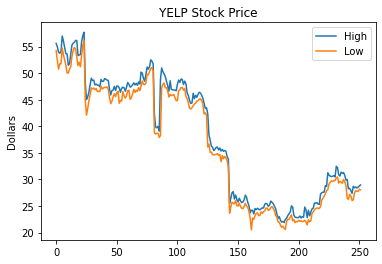

In [20]:
df.high.plot(label='High')
df.low.plot(label='Low')
plt.title('YELP Stock Price')
plt.ylabel('Dollars')
plt.legend(loc='best');

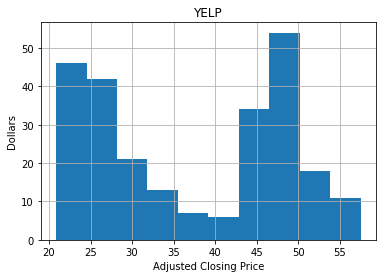

In [21]:
df.adj_close.hist()
plt.xlabel('Adjusted Closing Price')
plt.ylabel('Dollars')
plt.title('YELP');

### Bulk Operations

Methods like ``sum()`` and ``std()`` work on entire columns. 

We can run our own functions across all values in a column (or row) using ``apply()``.

As an example, let's go back to this plot:

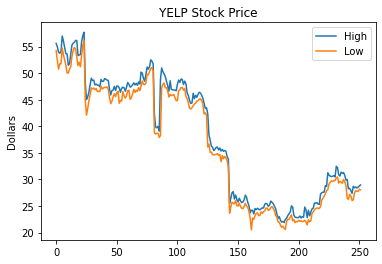

In [22]:
df.high.plot(label='High')
df.low.plot(label='Low')
plt.title('YELP Stock Price')
plt.ylabel('Dollars')
plt.legend(loc='best');

It's __almost__ perfect.  The only problem is the $x$-axis: it should show time.

To fix this, we need to make the dataframe __index__ -- that is, the __row labels__ -- into dates.

We have a problem however: the "dates" in our data are only __strings__.   We need Pandas to understand that they are actually dates.

In [23]:
df.date.head()

0    2015-01-02
1    2015-01-05
2    2015-01-06
3    2015-01-07
4    2015-01-08
Name: date, dtype: object

The **values** property of the column returns a list of values for the column. Inspecting the first value reveals that these are strings with a particular format.

In [24]:
first_date = df.date.values[0]
first_date

'2015-01-02'

To convert these strings to actual dates we'll use the ``datetime`` standard python package:

In [25]:
datetime.strptime(first_date, "%Y-%m-%d")

datetime.datetime(2015, 1, 2, 0, 0)

And to do this for each string in the ``date`` column we will use ``.apply()``:

In [26]:
new_df = df.copy()
new_df.date = df.date.apply(lambda d: datetime.strptime(d, "%Y-%m-%d"))
new_df.date.head()

0   2015-01-02
1   2015-01-05
2   2015-01-06
3   2015-01-07
4   2015-01-08
Name: date, dtype: datetime64[ns]

Each row in a DataFrame is associated with an index, which is a label that uniquely identifies a row.

The row indices so far have been auto-generated by pandas, and are simply integers starting from 0. 

Fixing this is as easy as assigning to the `index` property of the DataFrame.

In [27]:
new_df.index = new_df.date
new_df.head()

,date,high,low,open,close,volume,adj_close
date,,,,,,,
2015-01-02,2015-01-02,55.599998,54.240002,55.459999,55.150002,1664500,55.150002
2015-01-05,2015-01-05,54.950001,52.330002,54.540001,52.529999,2023000,52.529999
2015-01-06,2015-01-06,53.930000,50.750000,52.549999,52.439999,3762800,52.439999
2015-01-07,2015-01-07,53.750000,51.759998,53.320000,52.209999,1548200,52.209999
2015-01-08,2015-01-08,54.139999,51.759998,52.590000,53.830002,2015300,53.830002


Now that we have made an index based on a real date, we can drop the original `date` column.

In [28]:
new_df = new_df.drop(['date'],axis=1)
new_df.head()

,high,low,open,close,volume,adj_close
date,,,,,,
2015-01-02,55.599998,54.240002,55.459999,55.150002,1664500,55.150002
2015-01-05,54.950001,52.330002,54.540001,52.529999,2023000,52.529999
2015-01-06,53.930000,50.750000,52.549999,52.439999,3762800,52.439999
2015-01-07,53.750000,51.759998,53.320000,52.209999,1548200,52.209999
2015-01-08,54.139999,51.759998,52.590000,53.830002,2015300,53.830002


Now we can see that Pandas handles these dates quite nicely:

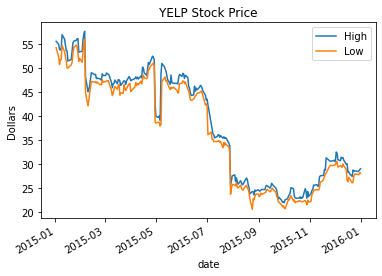

In [29]:
new_df.high.plot(label='High')
new_df.low.plot(label='Low')
plt.title('YELP Stock Price')
plt.ylabel('Dollars')
plt.legend(loc='best');

### Accessing rows of the DataFrame

So far we've seen how to access a column of the DataFrame.  To access a row we use a different notation.

To access a row by its index value, use the **`.loc()`** method.

In [30]:
new_df.loc[datetime(2015,1,23,0,0)]

high         5.564000e+01
low          5.430000e+01
open         5.466000e+01
close        5.519000e+01
volume       1.636400e+06
adj_close    5.519000e+01
Name: 2015-01-23 00:00:00, dtype: float64

To access a row by its sequence number (ie, like an array index), use **`.iloc()`** ('Integer Location')

In [31]:
new_df.iloc[0,:]

high         5.560000e+01
low          5.424000e+01
open         5.546000e+01
close        5.515000e+01
volume       1.664500e+06
adj_close    5.515000e+01
Name: 2015-01-02 00:00:00, dtype: float64

To iterate over the rows, use **`.iterrows()`**

In [32]:
num_positive_days = 0
for idx, row in df.iterrows():
    if row.close > row.open:
        num_positive_days += 1
        
print("The total number of positive-gain days is {}.".format(num_positive_days))

The total number of positive-gain days is 126.


## Filtering

It is easy to select interesting rows from the data.  

All the operations below return a new DataFrame, which itself can be treated the same way as all DataFrames we have seen so far.

In [33]:
tmp_high = new_df.high > 55
tmp_high.head()

date
2015-01-02     True
2015-01-05    False
2015-01-06    False
2015-01-07    False
2015-01-08    False
Name: high, dtype: bool

Summing a Boolean array is the same as counting the number of **`True`** values.

In [34]:
sum(tmp_high)

11

Now, let's select only the rows of **`df1`** that correspond to **`tmp_high`**

In [35]:
new_df[tmp_high]

,high,low,open,close,volume,adj_close
date,,,,,,
2015-01-02,55.599998,54.240002,55.459999,55.150002,1664500,55.150002
2015-01-09,56.990002,54.720001,55.959999,56.070000,6224200,56.070000
2015-01-12,56.060001,53.430000,56.000000,54.020000,2407700,54.020000
2015-01-22,55.279999,53.119999,53.869999,54.799999,2295400,54.799999
2015-01-23,55.639999,54.299999,54.660000,55.189999,1636400,55.189999
2015-01-26,55.790001,54.830002,55.119999,55.410000,1450300,55.410000
2015-01-27,56.160000,54.570000,56.060001,55.630001,2410400,55.630001
2015-01-28,56.150002,52.919998,56.150002,53.000000,2013100,53.000000
2015-02-03,55.930000,53.410000,53.830002,55.779999,2885400,55.779999


Putting it all together, we have the following commonly-used patterns:

In [36]:
positive_days = new_df[new_df.close > new_df.open]
positive_days.head()

,high,low,open,close,volume,adj_close
date,,,,,,
2015-01-08,54.139999,51.759998,52.590000,53.830002,2015300,53.830002
2015-01-09,56.990002,54.720001,55.959999,56.070000,6224200,56.070000
2015-01-16,51.490002,50.029999,50.180000,51.389999,2183300,51.389999
2015-01-21,53.500000,51.200001,51.200001,53.410000,3248100,53.410000
2015-01-22,55.279999,53.119999,53.869999,54.799999,2295400,54.799999


In [37]:
very_positive_days = new_df[(new_df.close - new_df.open) > 4]
very_positive_days.head()

,high,low,open,close,volume,adj_close
date,,,,,,
2015-05-07,48.73,38.220001,38.220001,47.009998,33831600,47.009998


## Creating new columns

To create a new column, simply assign values to it.  Think of the columns as a dictionary:

In [38]:
new_df['profit'] = (new_df.open < new_df.close)
new_df.head()

,high,low,open,close,volume,adj_close,profit
date,,,,,,,
2015-01-02,55.599998,54.240002,55.459999,55.150002,1664500,55.150002,False
2015-01-05,54.950001,52.330002,54.540001,52.529999,2023000,52.529999,False
2015-01-06,53.930000,50.750000,52.549999,52.439999,3762800,52.439999,False
2015-01-07,53.750000,51.759998,53.320000,52.209999,1548200,52.209999,False
2015-01-08,54.139999,51.759998,52.590000,53.830002,2015300,53.830002,True


Let's give each row a ``gain`` value as a categorical variable:

In [39]:
for idx, row in new_df.iterrows():
    if row.open > row.close:
        new_df.loc[idx,'gain']='negative'
    elif (row.close - row.open) < 1:
        new_df.loc[idx,'gain']='small_gain'
    elif (row.close - row.open) < 6:
        new_df.loc[idx,'gain']='medium_gain'
    else:
        new_df.loc[idx,'gain']='large_gain'
new_df.head()

,high,low,open,close,volume,adj_close,profit,gain
date,,,,,,,,
2015-01-02,55.599998,54.240002,55.459999,55.150002,1664500,55.150002,False,negative
2015-01-05,54.950001,52.330002,54.540001,52.529999,2023000,52.529999,False,negative
2015-01-06,53.930000,50.750000,52.549999,52.439999,3762800,52.439999,False,negative
2015-01-07,53.750000,51.759998,53.320000,52.209999,1548200,52.209999,False,negative
2015-01-08,54.139999,51.759998,52.590000,53.830002,2015300,53.830002,True,medium_gain


Here is another, more "functional", way to accomplish the same thing.

Define a function that classifies rows, and **`apply`** it to each row.

In [40]:
def namerow(row):
    if row.open > row.close:
        return 'negative'
    elif (row.close - row.open) < 1:
        return 'small_gain'
    elif (row.close - row.open) < 6:
        return 'medium_gain'
    else:
        return 'large_gain'

new_df['test_column'] = new_df.apply(namerow, axis = 1)


In [41]:
new_df.head()

,high,low,open,close,volume,adj_close,profit,gain,test_column
date,,,,,,,,,
2015-01-02,55.599998,54.240002,55.459999,55.150002,1664500,55.150002,False,negative,negative
2015-01-05,54.950001,52.330002,54.540001,52.529999,2023000,52.529999,False,negative,negative
2015-01-06,53.930000,50.750000,52.549999,52.439999,3762800,52.439999,False,negative,negative
2015-01-07,53.750000,51.759998,53.320000,52.209999,1548200,52.209999,False,negative,negative
2015-01-08,54.139999,51.759998,52.590000,53.830002,2015300,53.830002,True,medium_gain,medium_gain


OK, point made, let's get rid of that extraneous `test_column`:

In [42]:
new_df.drop('test_column', axis = 1)

,high,low,open,close,volume,adj_close,profit,gain
date,,,,,,,,
2015-01-02,55.599998,54.240002,55.459999,55.150002,1664500,55.150002,False,negative
2015-01-05,54.950001,52.330002,54.540001,52.529999,2023000,52.529999,False,negative
2015-01-06,53.930000,50.750000,52.549999,52.439999,3762800,52.439999,False,negative
2015-01-07,53.750000,51.759998,53.320000,52.209999,1548200,52.209999,False,negative
2015-01-08,54.139999,51.759998,52.590000,53.830002,2015300,53.830002,True,medium_gain
...,...,...,...,...,...,...,...,...
2015-12-24,28.590000,27.900000,28.270000,28.400000,587400,28.400000,True,small_gain
2015-12-28,28.379999,27.770000,28.120001,27.879999,1004500,27.879999,False,negative
2015-12-29,28.540001,27.740000,27.950001,28.480000,1103900,28.480000,True,small_gain


## Grouping

An **extremely** powerful DataFrame method is **`groupby()`**. 

This is entirely analagous to **`GROUP BY`** in SQL.

It will group the rows of a DataFrame by the values in one (or more) columns, and let you iterate through each group.

Here we will look at the average gain among the  categories of gains (negative, small, medium and large) we defined above and stored in column `gain`.

In [43]:
gain_groups = new_df.groupby('gain')

Essentially, **`gain_groups`** behaves like a dictionary:
* the keys are the unique values found in the `gain` column, and 
* the values are DataFrames that contain only the rows having the corresponding unique values.

In [44]:
for gain, gain_data in gain_groups:
    print(gain)
    print(gain_data.head())
    print('=============================')

large_gain
             high        low       open      close    volume  adj_close  \
date                                                                      
2015-05-07  48.73  38.220001  38.220001  47.009998  33831600  47.009998   

            profit        gain test_column  
date                                        
2015-05-07    True  large_gain  large_gain  
medium_gain
                 high        low       open      close   volume  adj_close  \
date                                                                         
2015-01-08  54.139999  51.759998  52.590000  53.830002  2015300  53.830002   
2015-01-16  51.490002  50.029999  50.180000  51.389999  2183300  51.389999   
2015-01-21  53.500000  51.200001  51.200001  53.410000  3248100  53.410000   
2015-02-03  55.930000  53.410000  53.830002  55.779999  2885400  55.779999   
2015-02-04  57.070000  55.250000  55.529999  56.740002  2498600  56.740002   

            profit         gain  test_column  
date                  

In [45]:
for gain, gain_data in new_df.groupby("gain"):
    print('The average closing value for the {} group is {}'.format(gain,
                                                           gain_data.close.mean()))

The average closing value for the large_gain group is 47.0099983215332
The average closing value for the medium_gain group is 39.72307696709266
The average closing value for the negative group is 37.38476184057811
The average closing value for the small_gain group is 36.45555554014264


## Other Pandas Classes

A DataFrame is essentially an annotated 2-D array.

Pandas also has annotated versions of 1-D and 3-D arrays.

A 1-D array in Pandas is called a `Series`.

A 3-D array in Pandas is created using a ``MultiIndex``.

To use these, read the documentation!

## Comparing multiple stocks

As a last task, we will use the experience we obtained so far -- and learn some new things -- in order to compare the performance of different stocks we obtained from Yahoo finance.

In [46]:
stocks = ['ORCL', 'TSLA', 'IBM','YELP', 'MSFT']
attr = 'Close'
stock_df = web.DataReader(stocks, 
                    data_source,                               
                    start=datetime(2014, 1, 1), 
                    end=datetime(2014, 12, 31))[attr]
stock_df.head()

Symbols,ORCL,TSLA,IBM,YELP,MSFT
Date,,,,,
2014-01-02,37.840000,30.020000,185.529999,67.919998,37.160000
2014-01-03,37.619999,29.912001,186.639999,67.660004,36.910000
2014-01-06,37.470001,29.400000,186.000000,71.720001,36.130001
2014-01-07,37.849998,29.872000,189.710007,72.660004,36.410000
2014-01-08,37.720001,30.256001,187.970001,78.419998,35.759998


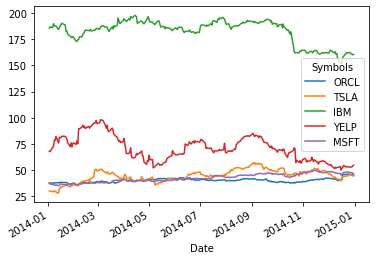

In [47]:
stock_df.plot();

Next, we will calculate returns over a period of length $T,$ defined as:

$$ r(t) = \frac{f(t)-f(t-T)}{f(t)} $$

The returns can be computed with a simple DataFrame method **`pct_change()`**.  Note that for the first $T$ timesteps, this value is not defined (of course):

In [48]:
rets = stock_df.pct_change(30)
rets.iloc[25:35]

Symbols,ORCL,TSLA,IBM,YELP,MSFT
Date,,,,,
2014-02-07,NaN,NaN,NaN,NaN,NaN
2014-02-10,NaN,NaN,NaN,NaN,NaN
2014-02-11,NaN,NaN,NaN,NaN,NaN
2014-02-12,NaN,NaN,NaN,NaN,NaN
2014-02-13,NaN,NaN,NaN,NaN,NaN
2014-02-14,0.003700,0.320653,-0.009918,0.321849,0.012379
2014-02-18,0.009304,0.361995,-0.018485,0.355897,0.013817
2014-02-19,0.010675,0.317279,-0.016398,0.254880,0.038195
2014-02-20,0.011096,0.405798,-0.028728,0.257501,0.036803


Now we'll plot the timeseries of the returns of the different stocks.

Notice that the `NaN` values are gracefully dropped by the plotting function.

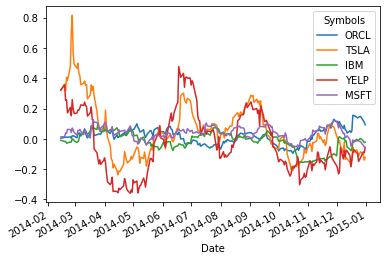

In [49]:
rets.plot();

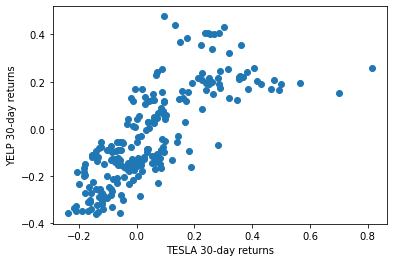

In [50]:
plt.scatter(rets.TSLA, rets.YELP)
plt.xlabel('TESLA 30-day returns')
plt.ylabel('YELP 30-day returns');

There appears to be some (fairly strong) correlation between the movement of TSLA and YELP stocks.  Let's measure this.

The correlation coefficient between variables $X$ and $Y$ is defined as follows:

$$ \text{Corr}(X,Y) = \frac{E\left[(X-\mu_X)(Y-\mu_Y)\right]}{\sigma_X\sigma_Y} $$

Pandas provides a dataframe method to compute the correlation coefficient of all pairs of columns: **`corr()`**.

In [51]:
rets.corr()

Symbols,ORCL,TSLA,IBM,YELP,MSFT
Symbols,,,,,
ORCL,1.000000,0.000981,0.025742,-0.084176,0.114090
TSLA,0.000981,1.000000,0.196504,0.768509,0.415746
IBM,0.025742,0.196504,1.000000,0.104776,0.340422
YELP,-0.084176,0.768509,0.104776,1.000000,0.262595
MSFT,0.114090,0.415746,0.340422,0.262595,1.000000


It takes a bit of time to examine that table and draw conclusions.  

To speed that process up it helps to visualize the table.

We will learn more about visualization later, but for now this is a simple example.

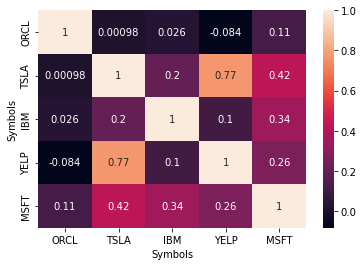

In [52]:
sns.heatmap(rets.corr(), annot=True);

Finally, it is important to know that the plotting performed by Pandas is just a layer on top of `matplotlib` (i.e., the `plt` package).  

So Panda's plots can (and often should) be replaced or improved by using additional functions from `matplotlib`.

For example, suppose we want to know both the returns as well as the standard deviation of the returns of a stock (i.e., its risk).  

Here is visualization of the result of such an analysis, and we construct the plot using only functions from `matplotlib`.

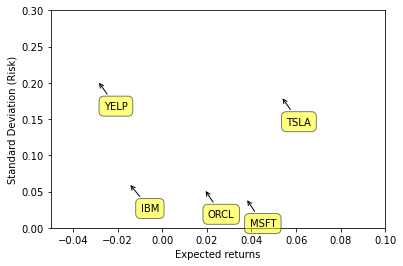

In [53]:
# plt.scatter(rets.mean(), rets.std());
plt.xlabel('Expected returns')
plt.ylabel('Standard Deviation (Risk)')
plt.xlim([-.05,.1])
plt.ylim([0,.3])
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (30, -30),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

To understand what these functions are doing, (especially the `annotate` function), you will need to consult the online documentation for matplotlib.  Just use Google to find it.